# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
rec = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"


    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    elements = parsed_content.find_all(class_=True)
    for element in elements:
        for class_name in element['class']:
            #print(class_name)
            rec.append(class_name)
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
prefix_y = 'rating-yes'
prefix_n = 'rating-no'
matching_classes = [class_name for class_name in rec if class_name.startswith(prefix_y) or class_name.startswith(prefix_n)]
matching_classes

['rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-yes',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-yes',
 'rating-yes',
 'rating-yes',
 'rating-yes',
 'rating-no',
 'rating-yes',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-yes',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',
 'rating-no',


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df['recommend'] = matching_classes
df.head()

reviews   recommend
0  ✅ Trip Verified |  While BA may have made some...   rating-no
1  ✅ Trip Verified | British Airways new Club Sui...   rating-no
2  ✅ Trip Verified |  Four very pleasant, on time...  rating-yes
3  Not Verified |   We travel extensively over 25...   rating-no
4  ✅ Trip Verified |  Flight delayed an hour due ...  rating-yes

In [ ]:
df.to_csv("data/BA_reviews.csv")

In [ ]:
df = pd.read_csv('data/BA_reviews.csv')

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
 df = df.drop(columns=df.columns[0])

In [ ]:
df['reviews'] = df['reviews'].str.split('|').str[1].str.strip()

In [ ]:
df['recommend'] = df['recommend'].str.split('-').str[1].str.strip()

In [ ]:
df.head()

reviews recommend
0  While BA may have made some positive improveme...        no
1  British Airways new Club Suite is a marked imp...        no
2  Four very pleasant, on time flights with frien...       yes
3  We travel extensively over 25 years and tend t...        no
4  Flight delayed an hour due to bad weather arou...       yes

In [ ]:
#!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    stemmed_final = [porter.stem(word) for word in filtered_text]
    return ' '.join(filtered_text)

df['reviews_no_stopwords'] = df['reviews'].apply(remove_stopwords)
df.head()

reviews recommend  \
0  While BA may have made some positive improveme...        no   
1  British Airways new Club Suite is a marked imp...        no   
2  Four very pleasant, on time flights with frien...       yes   
3  We travel extensively over 25 years and tend t...        no   
4  Flight delayed an hour due to bad weather arou...       yes   

                                reviews_no_stopwords  
0  BA may made positive improvements Club World p...  
1  British Airways new Club Suite marked improvem...  
2  Four pleasant , time flights friendly , helpfu...  
3  travel extensively 25 years tend use BA regula...  
4  Flight delayed hour due bad weather around JFK...

In [ ]:
df.head()

reviews recommend  \
0  While BA may have made some positive improveme...        no   
1  British Airways new Club Suite is a marked imp...        no   
2  Four very pleasant, on time flights with frien...       yes   
3  We travel extensively over 25 years and tend t...        no   
4  Flight delayed an hour due to bad weather arou...       yes   

                                reviews_no_stopwords  
0  BA may made positive improvements Club World p...  
1  British Airways new Club Suite marked improvem...  
2  Four pleasant , time flights friendly , helpfu...  
3  travel extensively 25 years tend use BA regula...  
4  Flight delayed hour due bad weather around JFK...

In [ ]:
#!pip install transformers

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
def bert_sentiment(review):
    result = sentiment_analysis(review)[0]
    return result['label'], result['score']

df[['bert_sentiment', 'bert_confidence']] = df['reviews_no_stopwords'].apply(lambda x: pd.Series(bert_sentiment(x)))

In [ ]:
df.loc[:, ['recommend', 'bert_sentiment']]

recommend bert_sentiment
0          no       POSITIVE
1          no       POSITIVE
2         yes       POSITIVE
3          no       NEGATIVE
4         yes       NEGATIVE
..        ...            ...
995        no       NEGATIVE
996        no       NEGATIVE
997        no       NEGATIVE
998        no       NEGATIVE
999        no       NEGATIVE

[1000 rows x 2 columns]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('recommend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('bert_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['bert_sentiment'].value_counts()
    for x_label, grp in _df_2.groupby('recommend')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('recommend')
_ = plt.ylabel('bert_sentiment')

In [ ]:
import matplotlib.pyplot as plt

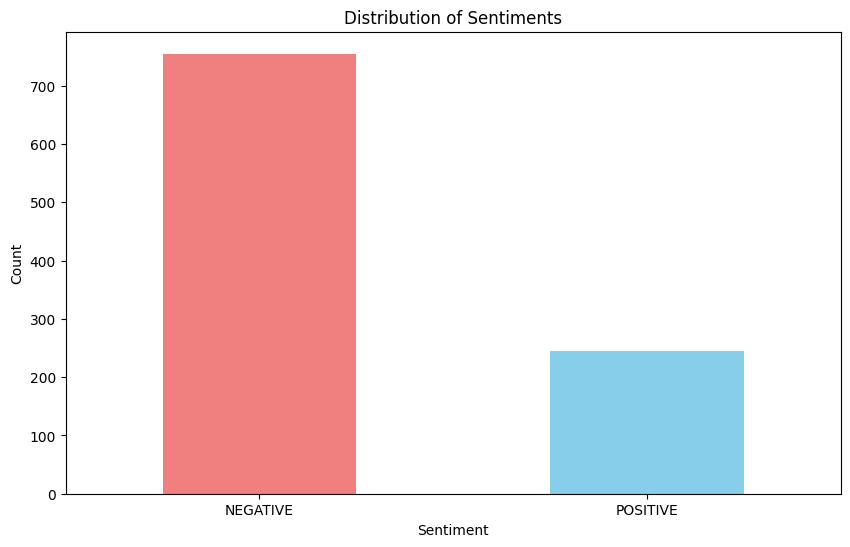

In [ ]:
plt.figure(figsize=(10, 6))
sentiment_counts = df['bert_sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

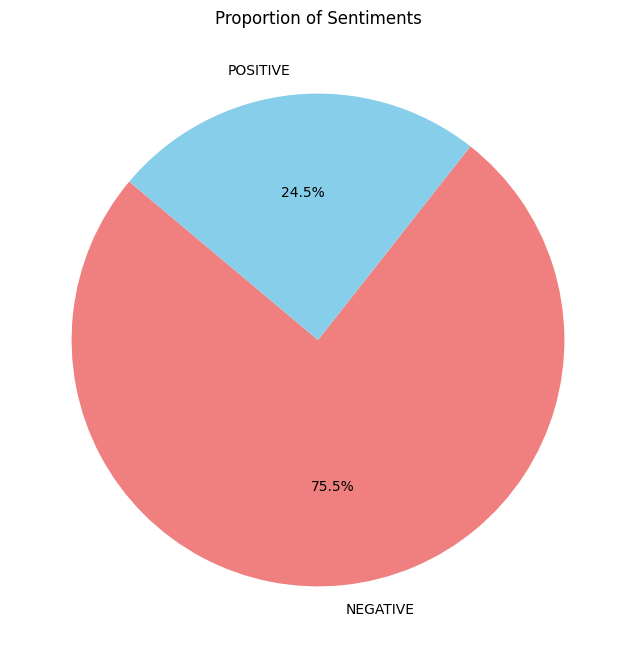

In [ ]:
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
plt.title('Proportion of Sentiments')
plt.ylabel('')
plt.show()

In [ ]:
#!pip install textblob

In [ ]:
from textblob import TextBlob

def textblob_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

df['textblob_sentiment'] = df['reviews_no_stopwords'].apply(textblob_sentiment)

In [ ]:
df.head()

reviews recommend  \
0  While BA may have made some positive improveme...        no   
1  British Airways new Club Suite is a marked imp...        no   
2  Four very pleasant, on time flights with frien...       yes   
3  We travel extensively over 25 years and tend t...        no   
4  Flight delayed an hour due to bad weather arou...       yes   

                                reviews_no_stopwords bert_sentiment  \
0  BA may made positive improvements Club World p...       POSITIVE   
1  British Airways new Club Suite marked improvem...       POSITIVE   
2  Four pleasant , time flights friendly , helpfu...       POSITIVE   
3  travel extensively 25 years tend use BA regula...       NEGATIVE   
4  Flight delayed hour due bad weather around JFK...       NEGATIVE   

   bert_confidence  textblob_sentiment  
0         0.933136           -0.075384  
1         0.934085            0.065820  
2         0.956593            0.253571  
3         0.997589            0.098037  
4         0.986906           -0.081000

In [ ]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['tb_sentiment_category'] = df['textblob_sentiment'].apply(categorize_sentiment)
df.head()

reviews recommend  \
0  While BA may have made some positive improveme...        no   
1  British Airways new Club Suite is a marked imp...        no   
2  Four very pleasant, on time flights with frien...       yes   
3  We travel extensively over 25 years and tend t...        no   
4  Flight delayed an hour due to bad weather arou...       yes   

                                reviews_no_stopwords bert_sentiment  \
0  BA may made positive improvements Club World p...       POSITIVE   
1  British Airways new Club Suite marked improvem...       POSITIVE   
2  Four pleasant , time flights friendly , helpfu...       POSITIVE   
3  travel extensively 25 years tend use BA regula...       NEGATIVE   
4  Flight delayed hour due bad weather around JFK...       NEGATIVE   

   bert_confidence  textblob_sentiment tb_sentiment_category  
0         0.933136           -0.075384              Negative  
1         0.934085            0.065820              Positive  
2         0.956593            0.253571              Positive  
3         0.997589            0.098037              Positive  
4         0.986906           -0.081000              Negative

from matplotlib import pyplot as plt
_df_3['bert_confidence'].plot(kind='hist', bins=20, title='bert_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['textblob_sentiment'].plot(kind='hist', bins=20, title='textblob_sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('recommend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('reviews_no_stopwords').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('bert_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='bert_confidence', y='textblob_sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bert_confidence'].plot(kind='line', figsize=(8, 4), title='bert_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['textblob_sentiment'].plot(kind='line', figsize=(8, 4), title='textblob_sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['recommend'].value_counts()
    for x_label, grp in _df_12.groupby('reviews')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('reviews')
_ = plt.ylabel('recommend')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['reviews_no_stopwords'].value_counts()
    for x_label, grp in _df_13.groupby('recommend')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('recommend')
_ = plt.ylabel('reviews_no_stopwords')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['bert_sentiment'].value_counts()
    for x_label, grp in _df_14.groupby('reviews_no_stopwords')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('reviews_no_stopwords')
_ = plt.ylabel('bert_sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tb_sentiment_category'].value_counts()
    for x_label, grp in _df_15.groupby('bert_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('bert_sentiment')
_ = plt.ylabel('tb_sentiment_category')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='bert_confidence', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['recommend'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='bert_confidence', y='recommend', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['reviews_no_stopwords'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='bert_confidence', y='reviews_no_stopwords', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['bert_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='bert_confidence', y='bert_sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

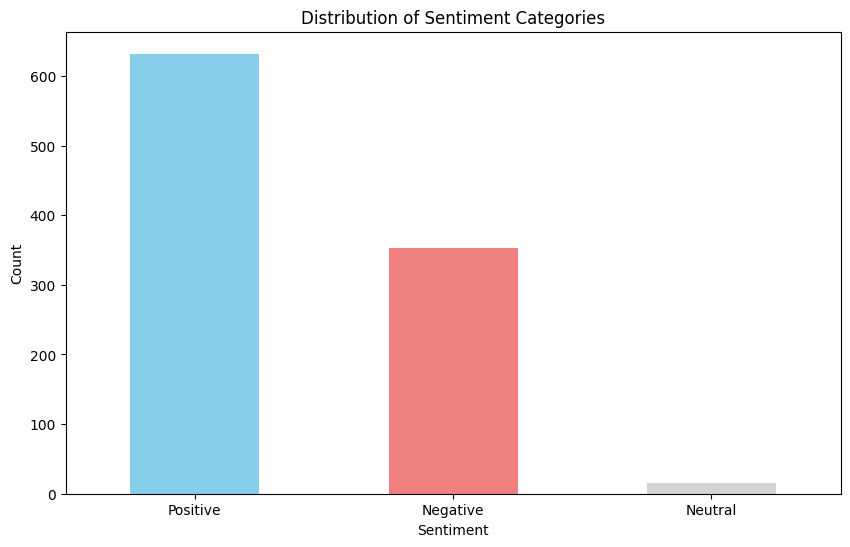

In [ ]:
plt.figure(figsize=(10, 6))
sentiment_counts_1 = df['tb_sentiment_category'].value_counts()
sentiment_counts_1.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgrey'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

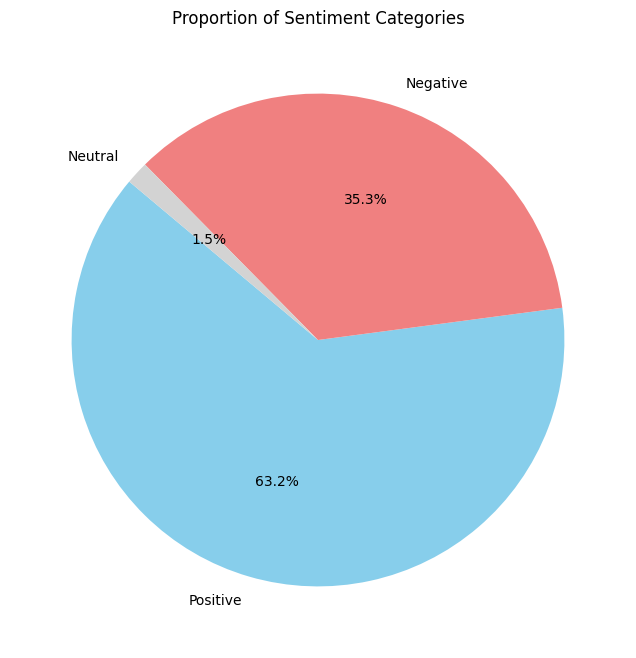

In [ ]:
plt.figure(figsize=(8, 8))
sentiment_counts_1.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgrey'])
plt.title('Proportion of Sentiment Categories')
plt.ylabel('')  # Hide the y-label
plt.show()

In [ ]:
# BERT ACCURACY
correct = 0
incorrect = 0
for i in range(len(df)):
    rec = df.iloc[i,1]
    bert = df.iloc[i,3]
    if (rec=='no' and bert=='NEGATIVE') or (rec=='yes' and bert=='POSITIVE'):
        correct+=1
    elif (rec=='yes' and bert=='NEGATIVE') or (rec=='no' and bert=='POSITIVE'):
        incorrect+=1
    else:
        print(rec)
        print(bert)
print(correct)
print(incorrect)

#ACCURACY SCORE
acc = correct/10                 #(correct/1000)*100
print('BERT model is ' +str(acc)+ '% accurate')

885
115
BERT model is 88.5% accurate


In [ ]:
# TEXTBLOB ACCURACY
correct1 = 0
incorrect1 = 0
for i in range(len(df)):
    rec = df.iloc[i,1]
    tb = df.iloc[i,6]
    if (rec=='no' and tb=='Negative') or (rec=='yes' and tb=='Positive'):
        correct1+=1
    if (rec=='yes' and tb=='Negative') or (rec=='no' and tb=='Positive'):
        incorrect1+=1
print(correct1)
print(incorrect1)
#ACCURACY SCORE
acc1 = (correct1/(correct1+incorrect1)) * 100
print('Textblob model is ' +str(round(acc1,2))+ '% accurate')

652
333
Textblob model is 66.19% accurate


## Proceeding with the BERT Model

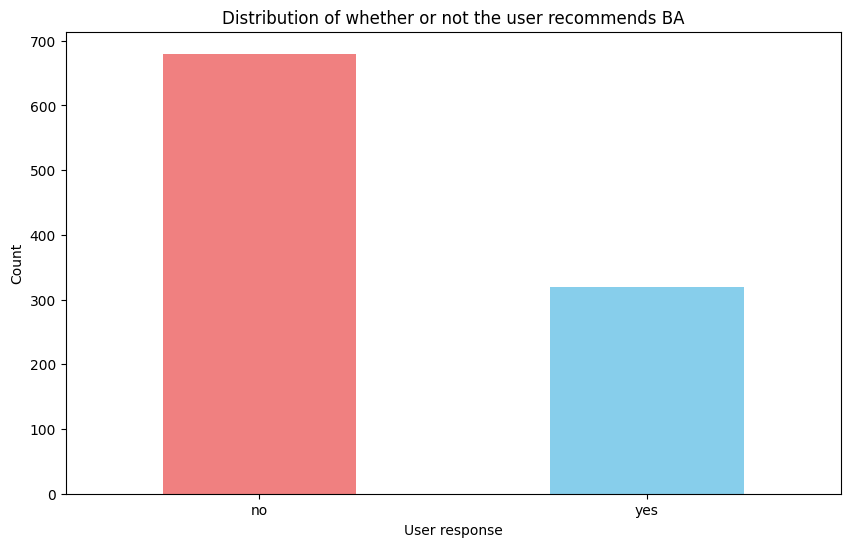

In [ ]:
plt.figure(figsize=(10, 6))
recommend_count = df['recommend'].value_counts()
recommend_count.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Distribution of whether or not the user recommends BA')
plt.xlabel('User response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Topic Modelling

In [ ]:
#!pip install gensim

In [ ]:
# for topic modelling, we need the reviews to be as a list of words
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_text = [porter.stem(word.lower()) for word in word_tokens if word.lower() not in stop_words and word.isalpha()]
    return filtered_text

# Apply preprocessing function to each review
df['reviews_token_list'] = df['reviews'].apply(preprocess_text)

In [ ]:
df.head()

reviews recommend  \
0  While BA may have made some positive improveme...        no   
1  British Airways new Club Suite is a marked imp...        no   
2  Four very pleasant, on time flights with frien...       yes   
3  We travel extensively over 25 years and tend t...        no   
4  Flight delayed an hour due to bad weather arou...       yes   

                                reviews_no_stopwords bert_sentiment  \
0  BA may made positive improvements Club World p...       POSITIVE   
1  British Airways new Club Suite marked improvem...       POSITIVE   
2  Four pleasant , time flights friendly , helpfu...       POSITIVE   
3  travel extensively 25 years tend use BA regula...       NEGATIVE   
4  Flight delayed hour due bad weather around JFK...       NEGATIVE   

   bert_confidence  textblob_sentiment tb_sentiment_category  \
0         0.933136           -0.075384              Negative   
1         0.934085            0.065820              Positive   
2         0.956593            0.253571              Positive   
3         0.997589            0.098037              Positive   
4         0.986906           -0.081000              Negative   

                                  reviews_token_list  
0  [ba, may, made, posit, improv, club, world, pr...  
1  [british, airway, new, club, suit, mark, impro...  
2  [four, pleasant, time, flight, friendli, help,...  
3  [travel, extens, year, tend, use, ba, regular,...  
4  [flight, delay, hour, due, bad, weather, aroun...

In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(df['reviews_token_list'])
corpus = [dictionary.doc2bow(text) for text in df['reviews_token_list']]

num_topics = 9 # Define number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20)

# Print the topics
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.042*"seat" + 0.013*"flight" + 0.011*"ba" + 0.009*"economi" + 0.008*"airlin" + 0.008*"board" + 0.007*"passeng" + 0.007*"time" + 0.006*"food" + 0.006*"london"
Topic 1: 0.019*"flight" + 0.012*"ba" + 0.009*"time" + 0.009*"london" + 0.009*"delay" + 0.006*"airway" + 0.006*"british" + 0.006*"plane" + 0.006*"servic" + 0.005*"arriv"
Topic 2: 0.020*"british" + 0.019*"airway" + 0.015*"servic" + 0.014*"custom" + 0.011*"ba" + 0.011*"london" + 0.010*"ticket" + 0.009*"flight" + 0.007*"airlin" + 0.006*"refund"
Topic 3: 0.042*"flight" + 0.023*"ba" + 0.014*"hour" + 0.011*"cancel" + 0.011*"book" + 0.011*"day" + 0.010*"us" + 0.010*"get" + 0.009*"custom" + 0.008*"call"
Topic 4: 0.017*"flight" + 0.016*"seat" + 0.013*"airlin" + 0.012*"ba" + 0.011*"british" + 0.011*"airway" + 0.010*"book" + 0.009*"custom" + 0.008*"fli" + 0.008*"servic"
Topic 5: 0.039*"flight" + 0.014*"return" + 0.010*"airlin" + 0.010*"ba" + 0.009*"hour" + 0.007*"cancel" + 0.007*"time" + 0.006*"journey" + 0.006*"dubai" + 0.006*"seat

## Visualising using WordCloud

In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
#!pip install --upgrade wordcloud Pillow

In [ ]:
#!pip install --upgrade pip

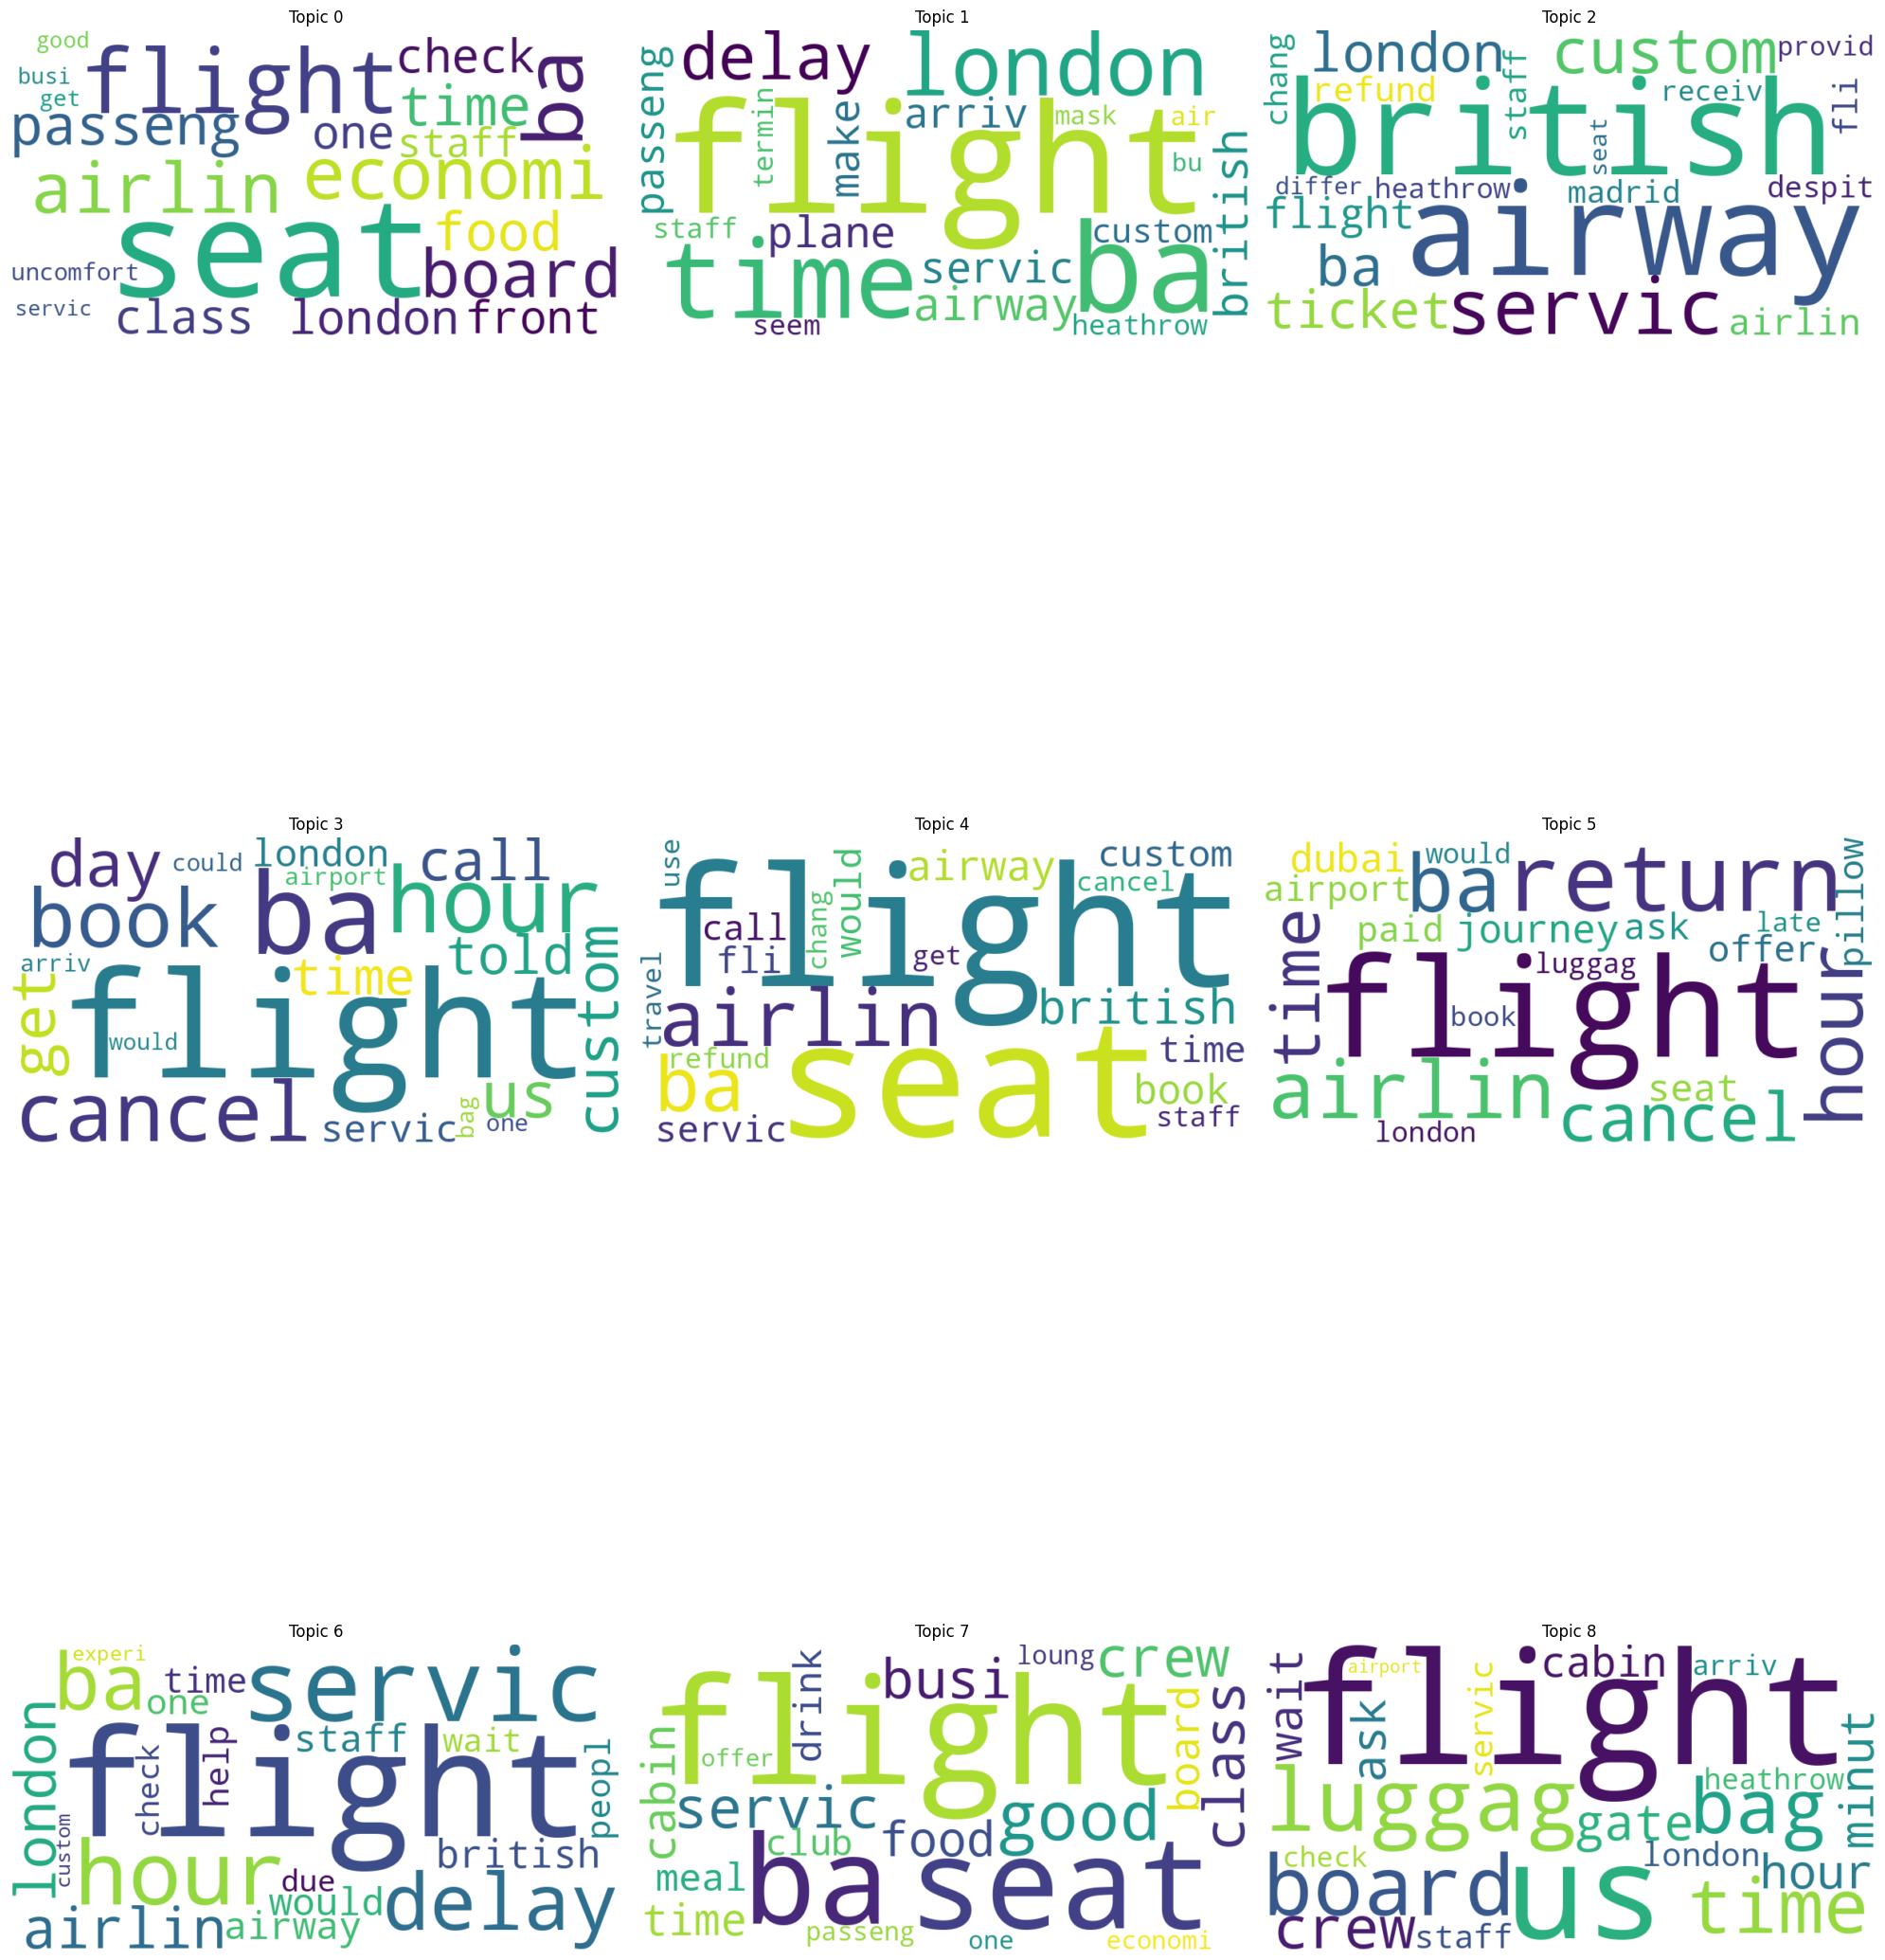

In [ ]:
ncols = 3  # Number of columns
nrows = (num_topics // ncols) + (num_topics % ncols)  # Number of rows

# Generate word clouds for each topic
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10 * nrows))

# Flatten axs for easy indexing if nrows or ncols is greater than 1
if nrows > 1 or ncols > 1:
    axs = axs.flatten()

for idx in range(num_topics):
    # Get the topic terms and their weights
    topic_terms = lda_model.show_topic(idx, 20)
    topic_words = {term: weight for term, weight in topic_terms}

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Plot word cloud
    axs[idx].imshow(wordcloud, interpolation='bilinear')
    axs[idx].set_title(f"Topic {idx}")
    axs[idx].axis('off')

# Hide any remaining empty subplots
for idx in range(num_topics, len(axs)):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()